In [2]:
import pandas as pd
import polars as pl

In [3]:
df = pd.read_csv('/home/dangnh36/datasets/byu/processed/spaced/16.0_trilinear.csv')
df

,tomo_id,ori_shape,ori_spacing,target_shape,target_spacing
0,tomo_003acc,"(500, 1912, 1847)",6.5,"(203, 776, 750)",16.0
1,tomo_00e047,"(300, 959, 928)",15.6,"(292, 935, 904)",16.0
2,tomo_00e463,"(500, 924, 956)",19.7,"(615, 1137, 1177)",16.0
3,tomo_01a877,"(300, 960, 928)",13.1,"(245, 786, 759)",16.0
4,tomo_02862f,"(300, 959, 928)",15.6,"(292, 935, 904)",16.0
...,...,...,...,...,...
643,tomo_fe050c,"(300, 959, 928)",15.6,"(292, 935, 904)",16.0
644,tomo_fe85f6,"(800, 928, 960)",13.1,"(655, 759, 786)",16.0
645,tomo_fea6e8,"(300, 960, 928)",16.8,"(315, 1008, 974)",16.0
646,tomo_ff505c,"(300, 959, 928)",15.6,"(292, 935, 904)",16.0


In [4]:
from byu.utils.misc import compute_target_spacing_shape

In [14]:
for i, row in df.iterrows():
    target_shape = eval(row['target_shape'])
    target_shape2= compute_target_spacing_shape(
        eval(row['ori_shape']),
        row['ori_spacing'],
        row['target_spacing'],
        method="torch",
        scale_extent=False,
    )
    assert target_shape == target_shape2, f'{target_shape} {target_shape2}'
print('DONE')

DONE


In [3]:
df = pl.scan_csv('../data/processed/all_gt_v3.csv').collect()
df

tomo_id,Z,Y,X,voxel_spacing,num_motors,motor_z,motor_y,motor_x,motor_zyx
str,i64,i64,i64,f64,i64,f64,f64,f64,str
"""tomo_003acc""",500,1912,1847,6.5,0,-1.0,-1.0,-1.0,"""[]"""
"""tomo_00e047""",300,959,928,15.6,1,169.0,546.0,603.0,"""[[169.0, 546.0, 603.0]]"""
"""tomo_00e463""",500,924,956,19.7,8,235.0,403.0,137.0,"""[[235.0, 403.0, 137.0], [243.0…"
"""tomo_01a877""",300,960,928,13.1,1,147.0,638.0,286.0,"""[[147.0, 638.0, 286.0]]"""
"""tomo_02862f""",300,959,928,15.6,1,101.0,351.0,120.0,"""[[101.0, 351.0, 120.0]]"""
…,…,…,…,…,…,…,…,…,…
"""ycw2013-11-24-19""",800,928,960,19.733,2,439.0,173.0,419.5,"""[[439.0, 173.0, 419.5], [406.5…"
"""ycw2013-11-24-2""",800,928,960,19.733,1,429.25,799.0,834.5,"""[[429.25, 799.0, 834.5]]"""
"""ycw2013-11-24-24""",800,928,960,19.733,6,348.25,332.0,260.5,"""[[348.25, 332.0, 260.5], [328.…"


(array([ 222., 1406.,  201.,   56.,   22.,    7.,   12.,    3.,    3.,
           3.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

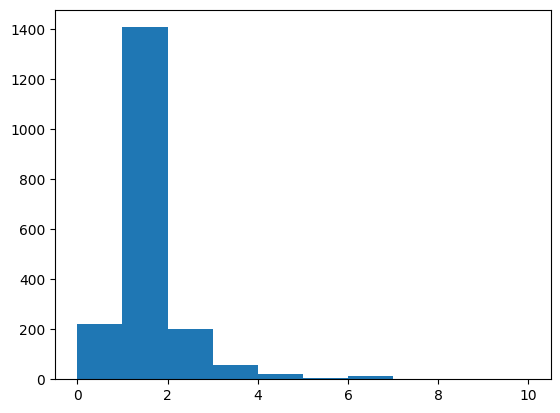

In [6]:
from matplotlib import pyplot as plt
plt.hist(df['num_motors'])

In [7]:
df['num_motors'].sum()

2245